In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

|Variable|Definition|
|---|---|
|id|Unique ID for the customer|
|---|---|
|Gender|Gender of the customer|
|---|---|
|Age|Age of the customer|
|---|---|
|Driving_License|0 : Customer does not have DL, 1 : Customer already has DL|
|---|---|
|Region_Code|Unique code for the region of the customer|
|---|---|
|Previously_Insured|1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance|
|---|---|
|Vehicle_Age|Age of the Vehicle|
|---|---|
|Vehicle_Damage|1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.|
|---|---|
|Annual_Premium|The amount customer needs to pay as premium in the year|
|---|---|
|PolicySalesChannel|Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.|
|---|---|
|Vintage|Number of Days, Customer has been associated with the company|
|---|---|
|Response|1 : Customer is interested, 0 : Customer is not interested|
|---|---|

In [2]:
train = pd.read_csv('../data/insurance/train.csv')
test = pd.read_csv('../data/insurance/test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.describe(include = ["O"])

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [5]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 30.5+ MB


(array([3.64067e+05, 1.65600e+04, 3.20000e+02, 6.10000e+01, 3.40000e+01,
        3.10000e+01, 2.10000e+01, 4.00000e+00, 4.00000e+00, 7.00000e+00]),
 array([  2630. ,  56383.5, 110137. , 163890.5, 217644. , 271397.5,
        325151. , 378904.5, 432658. , 486411.5, 540165. ]),
 <BarContainer object of 10 artists>)

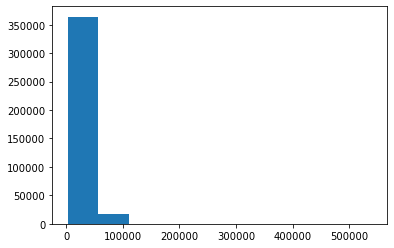

In [14]:
plt.hist(train['Annual_Premium'])

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier